In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 0

In [2]:
data = pd.read_csv("../data/raw/atp_matches_2023.csv", sep=";")
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,Taylor Fritz,R,193.0,USA,25.1,126610,5.0,NaN,Matteo Berrettini,R,196.0,ITA,26.7,7-6(4) 7-6(6),3,F,135.0,15.0,2.0,85.0,52.0,45.0,16.0,12.0,0.0,0.0,7.0,2.0,97.0,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,Frances Tiafoe,R,188.0,USA,24.9,207518,NaN,NaN,Lorenzo Musetti,R,185.0,ITA,20.8,6-2 0-0 RET,3,F,34.0,3.0,1.0,27.0,19.0,15.0,3.0,4.0,3.0,3.0,0.0,0.0,21.0,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,Taylor Fritz,R,193.0,USA,25.1,128034,2.0,NaN,Hubert Hurkacz,R,196.0,POL,25.8,7-6(5) 7-6(5),3,SF,104.0,11.0,0.0,80.0,50.0,44.0,19.0,12.0,4.0,4.0,17.0,1.0,82.0,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,Frances Tiafoe,R,188.0,USA,24.9,200390,NaN,NaN,Kacper Zuk,R,183.0,POL,23.9,6-3 6-3,3,SF,79.0,5.0,4.0,61.0,37.0,31.0,11.0,9.0,5.0,5.0,3.0,3.0,68.0,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,Stefanos Tsitsipas,R,193.0,GRE,24.3,126610,5.0,NaN,Matteo Berrettini,R,196.0,ITA,26.7,4-6 7-6(2) 6-4,3,SF,155.0,9.0,1.0,98.0,52.0,43.0,28.0,16.0,1.0,2.0,7.0,2.0,89.0,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [3]:
data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2242.000000,2.242000e+03,2242.000000,2242.000000,947.000000,2123.000000,2242.000000,2242.000000,587.000000,2019.000000,2238.000000,2242.000000,2010.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2231.000000,2231.000000,2221.000000,2221.000000
mean,67.454059,2.023044e+07,243.868867,143004.590098,7.814150,187.310410,26.616325,141581.216325,9.846678,186.535414,27.055049,3.339875,115.249254,6.667450,2.567872,79.151245,49.969939,37.728981,16.202442,12.666510,3.44434,4.975575,5.214655,3.242367,81.765148,50.426491,33.821982,14.621419,12.458431,4.757163,8.423203,75.090542,1636.746750,111.577217,1049.325979
std,45.272834,2.280950e+02,71.174683,41912.968871,7.151582,6.285256,4.281716,41539.799299,8.117545,6.470571,4.352415,0.751323,41.936358,5.056474,2.214787,29.215537,19.611692,13.968255,6.533234,4.228063,3.06337,4.012594,4.933720,2.614209,28.994284,19.271394,14.456402,6.809190,4.210317,3.266187,4.133788,118.308201,1666.536965,167.645209,1073.510850
min,4.000000,2.023010e+07,1.000000,100644.000000,1.000000,170.000000,17.900000,100644.000000,1.000000,170.000000,16.500000,3.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,32.000000,2.023022e+07,220.000000,106329.000000,3.000000,183.000000,24.000000,106214.000000,4.000000,183.000000,24.200000,3.000000,85.000000,3.000000,1.000000,58.000000,36.000000,28.000000,12.000000,10.000000,1.00000,2.000000,2.000000,1.000000,60.000000,36.000000,24.000000,10.000000,9.000000,2.000000,5.000000,18.000000,655.000000,38.000000,531.000000
50%,32.000000,2.023042e+07,276.000000,126203.000000,6.000000,185.000000,26.100000,126106.000000,7.000000,185.000000,26.600000,3.000000,110.000000,6.000000,2.000000,75.000000,47.000000,35.000000,15.000000,12.000000,3.00000,4.000000,4.000000,3.000000,77.000000,47.000000,31.000000,14.000000,12.000000,4.000000,8.000000,50.000000,880.000000,69.000000,771.000000
75%,128.000000,2.023063e+07,289.000000,200282.000000,10.000000,191.000000,28.800000,200221.000000,14.000000,191.000000,29.675000,3.000000,140.000000,9.000000,4.000000,95.000000,60.000000,45.000000,20.000000,15.000000,5.00000,7.000000,7.000000,4.000000,98.000000,61.000000,42.000000,18.000000,15.000000,7.000000,11.000000,87.000000,2050.000000,111.000000,1046.000000
max,128.000000,2.023082e+07,300.000000,210506.000000,32.000000,206.000000,41.700000,212041.000000,32.000000,206.000000,43.000000,5.000000,345.000000,42.000000,15.000000,228.000000,142.000000,100.000000,45.000000,31.000000,22.00000,26.000000,44.000000,25.000000,205.000000,143.000000,101.000000,47.000000,31.000000,19.000000,28.000000,1594.000000,9395.000000,1859.000000,9395.000000


In [4]:
data.drop(columns=["tourney_id", "draw_size", "tourney_date", "match_num", "winner_name", "winner_seed", "loser_seed",
                   "loser_name", "score", "winner_rank", "winner_rank_points","loser_rank", "loser_rank_points", "winner_entry", "loser_entry"], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_name   2242 non-null   object 
 1   surface        2242 non-null   object 
 2   tourney_level  2242 non-null   object 
 3   winner_id      2242 non-null   int64  
 4   winner_hand    2242 non-null   object 
 5   winner_ht      2123 non-null   float64
 6   winner_ioc     2242 non-null   object 
 7   winner_age     2242 non-null   float64
 8   loser_id       2242 non-null   int64  
 9   loser_hand     2242 non-null   object 
 10  loser_ht       2019 non-null   float64
 11  loser_ioc      2242 non-null   object 
 12  loser_age      2238 non-null   float64
 13  best_of        2242 non-null   int64  
 14  round          2242 non-null   object 
 15  minutes        2010 non-null   float64
 16  w_ace          2129 non-null   float64
 17  w_df           2129 non-null   float64
 18  w_svpt  

# Tratamiento de NaNs

In [6]:
data.isna().sum()/data.shape[0]*100

tourney_name      0.000000
surface           0.000000
tourney_level     0.000000
winner_id         0.000000
winner_hand       0.000000
winner_ht         5.307761
winner_ioc        0.000000
winner_age        0.000000
loser_id          0.000000
loser_hand        0.000000
loser_ht          9.946476
loser_ioc         0.000000
loser_age         0.178412
best_of           0.000000
round             0.000000
minutes          10.347904
w_ace             5.040143
w_df              5.040143
w_svpt            5.040143
w_1stIn           5.040143
w_1stWon          5.040143
w_2ndWon          5.040143
w_SvGms           5.040143
w_bpSaved         5.040143
w_bpFaced         5.040143
l_ace             5.040143
l_df              5.040143
l_svpt            5.040143
l_1stIn           5.040143
l_1stWon          5.040143
l_2ndWon          5.040143
l_SvGms           5.040143
l_bpSaved         5.040143
l_bpFaced         5.040143
dtype: float64

In [7]:
data.dropna(subset=['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon'], inplace=True)

In [8]:
data["winner_ht"].fillna(data["winner_ht"].mean(), inplace=True)
data["loser_ht"].fillna(data["loser_ht"].mean(), inplace=True)
data["loser_age"].fillna(data["loser_age"].mean(), inplace=True)
data["minutes"].fillna(data["minutes"].mean(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, 0 to 2145
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_name   2129 non-null   object 
 1   surface        2129 non-null   object 
 2   tourney_level  2129 non-null   object 
 3   winner_id      2129 non-null   int64  
 4   winner_hand    2129 non-null   object 
 5   winner_ht      2129 non-null   float64
 6   winner_ioc     2129 non-null   object 
 7   winner_age     2129 non-null   float64
 8   loser_id       2129 non-null   int64  
 9   loser_hand     2129 non-null   object 
 10  loser_ht       2129 non-null   float64
 11  loser_ioc      2129 non-null   object 
 12  loser_age      2129 non-null   float64
 13  best_of        2129 non-null   int64  
 14  round          2129 non-null   object 
 15  minutes        2129 non-null   float64
 16  w_ace          2129 non-null   float64
 17  w_df           2129 non-null   float64
 18  w_svpt       

# EDA

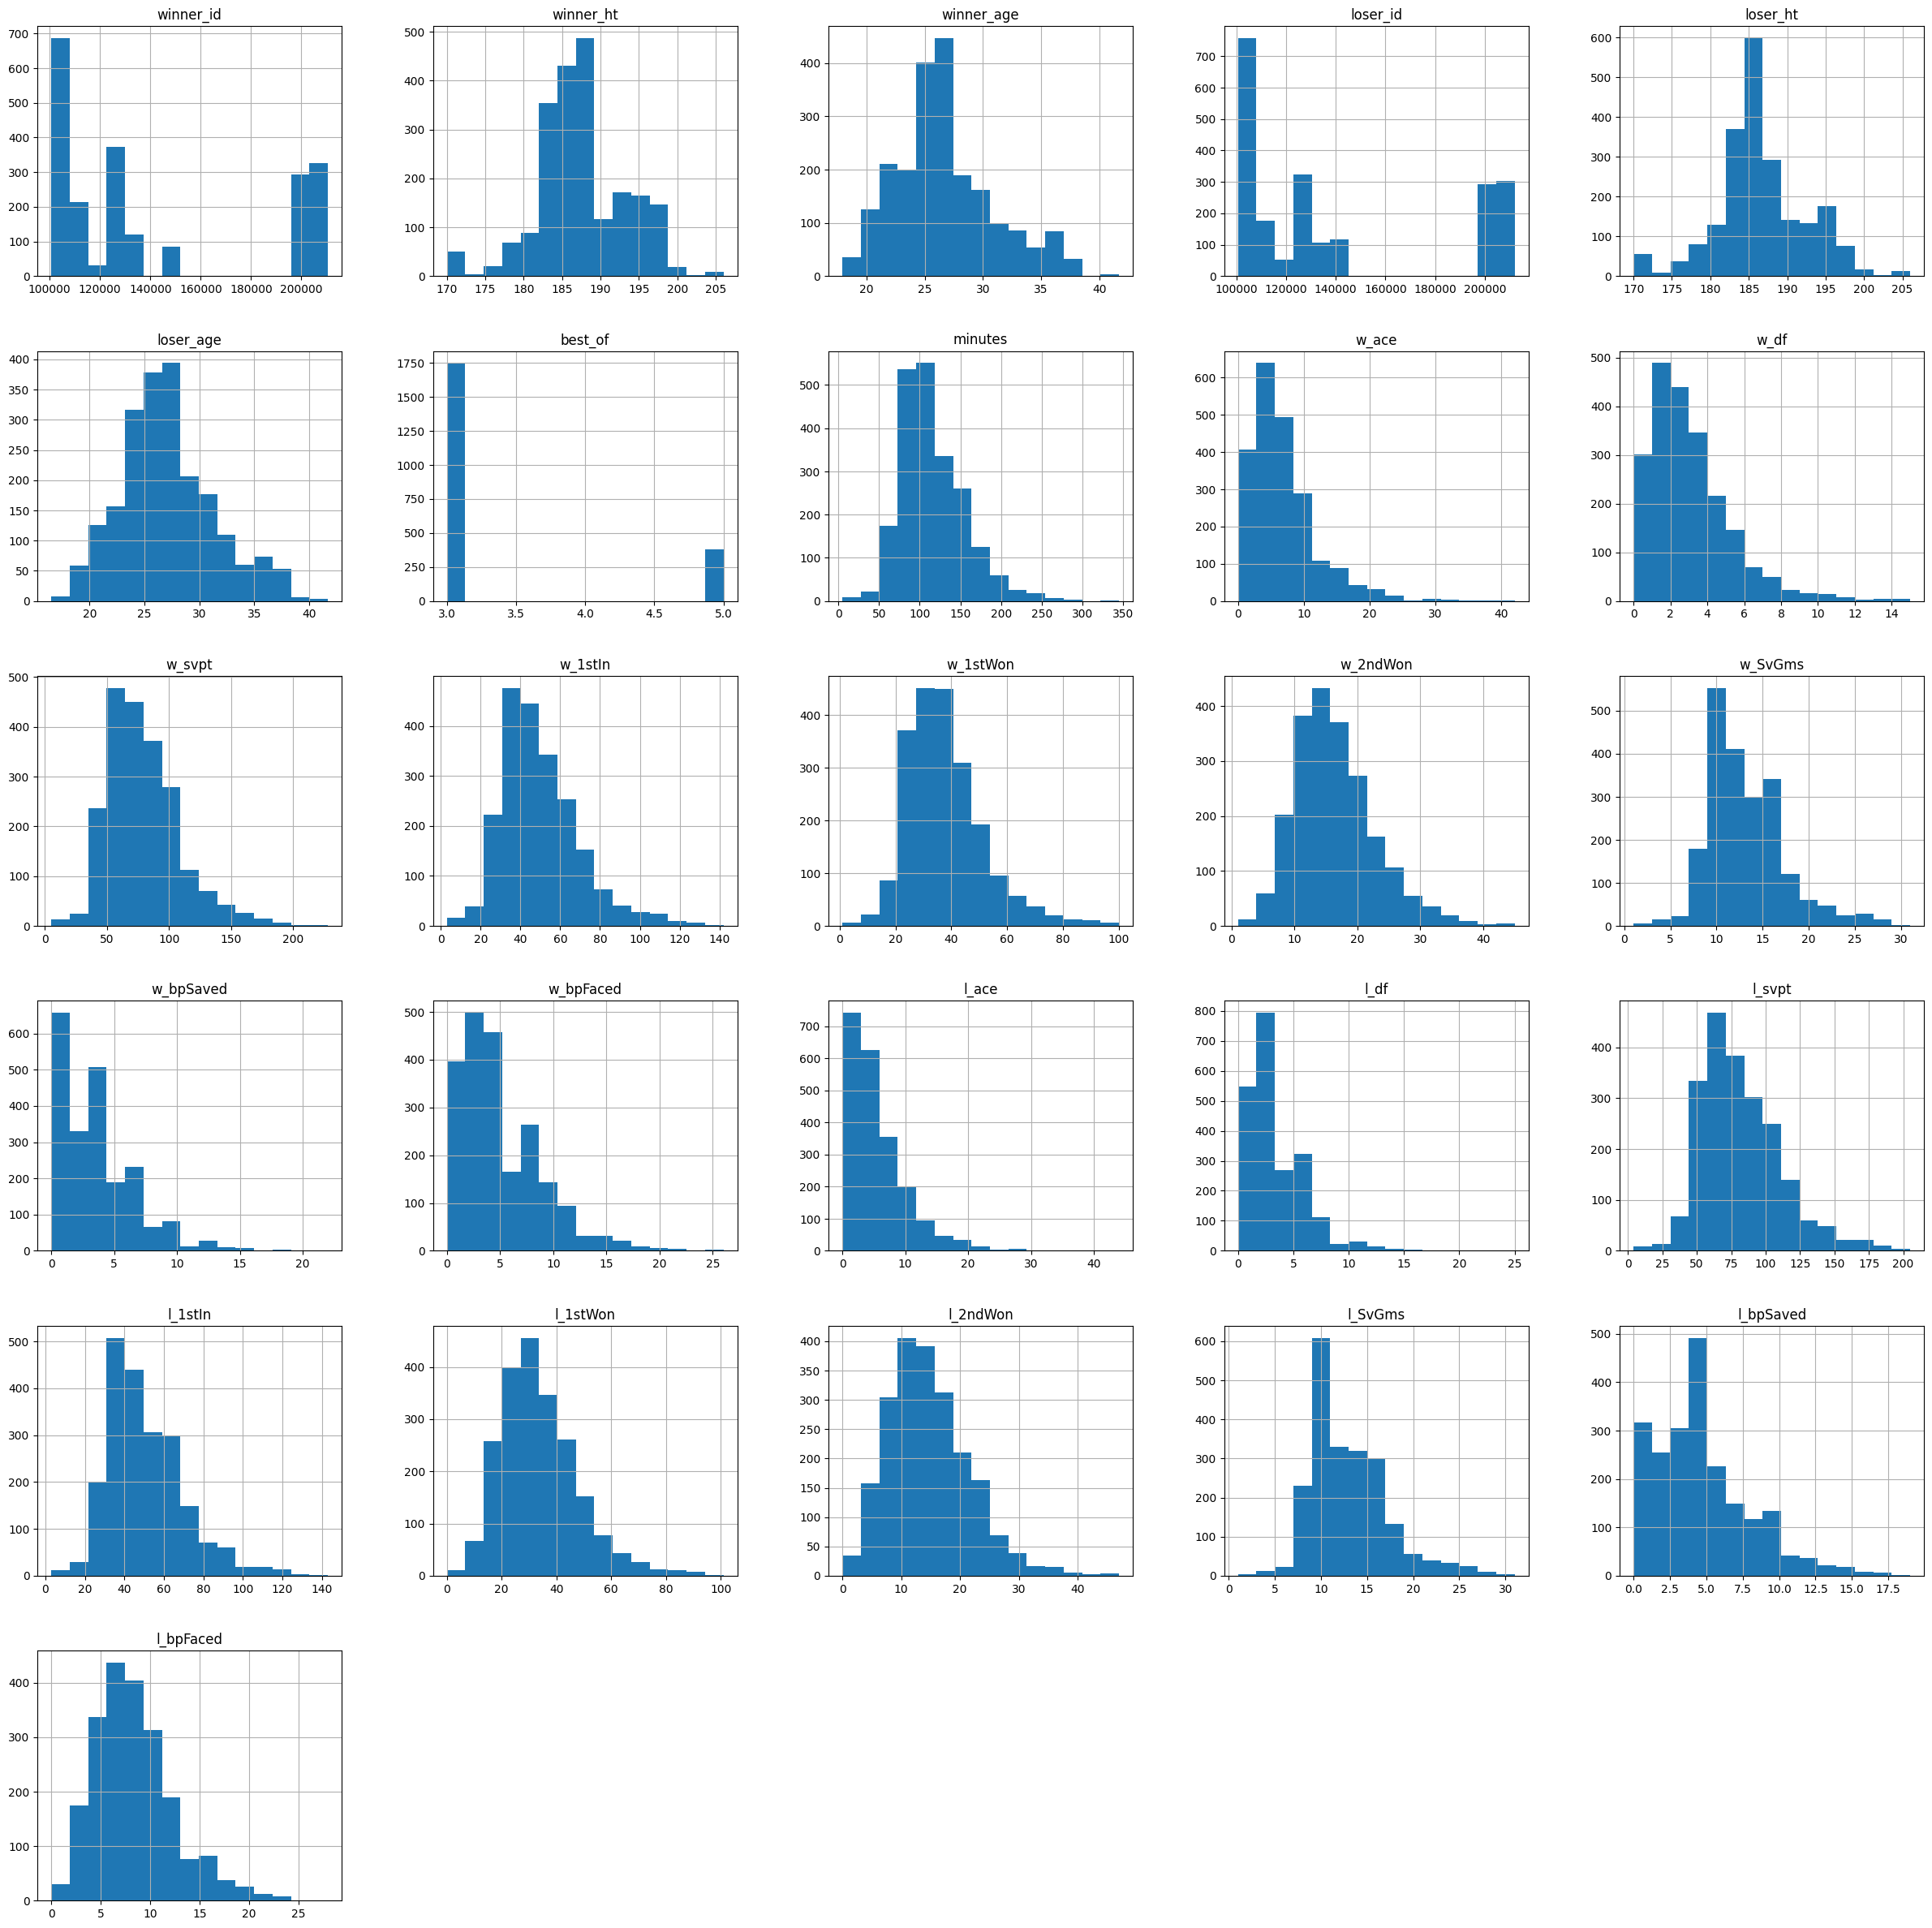

In [14]:
data.hist(figsize=(30,30), bins=15);

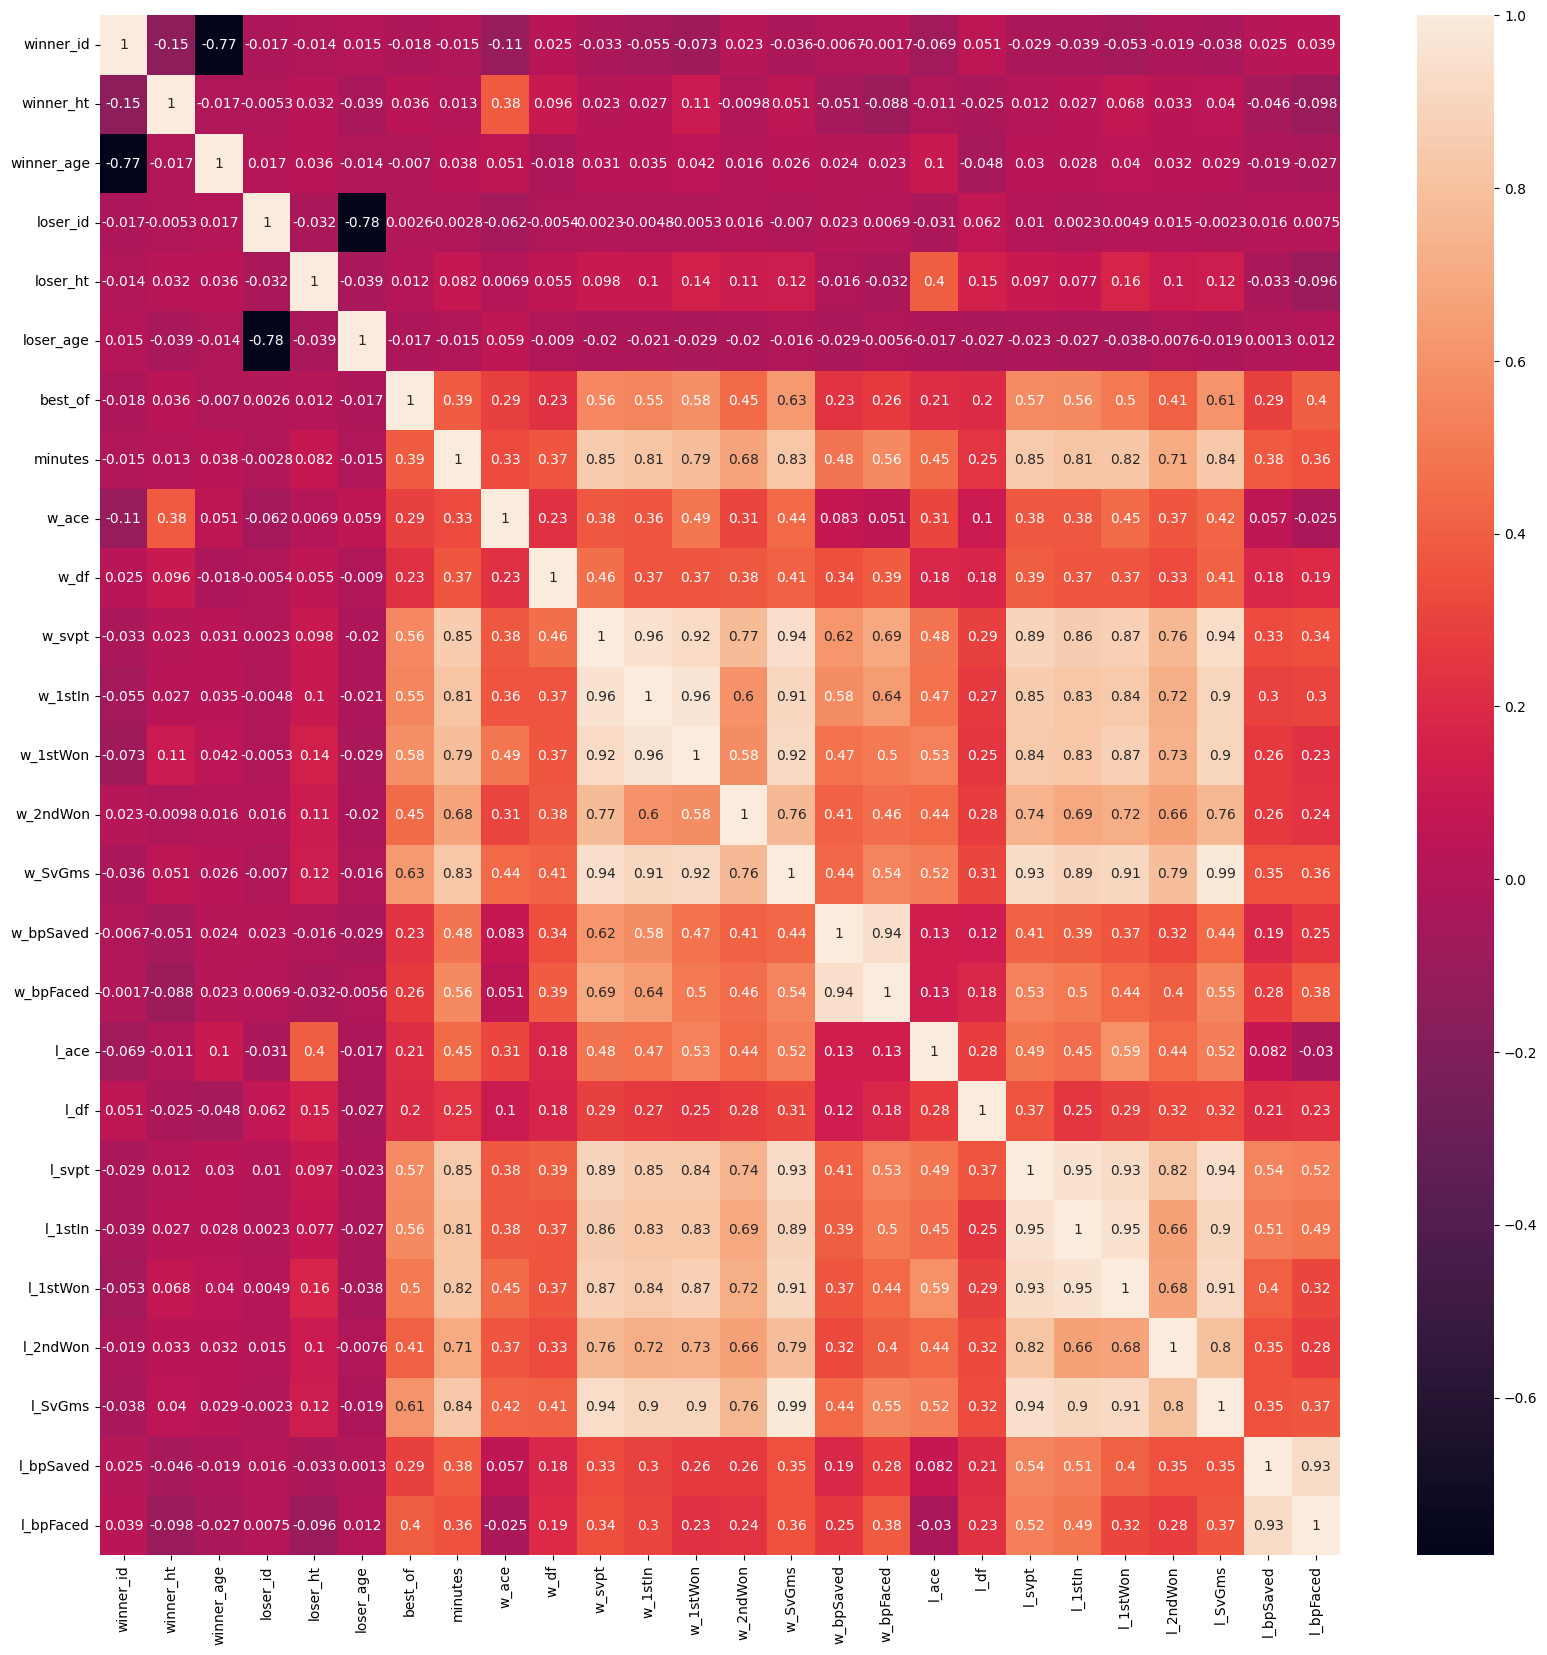

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True);

In [12]:
data.to_csv("../data/processed/tennisResults.csv", index=False)